# Goal of the project

The goal of this project is to control a 2D quadrotor to perform acrobatic moves. There are 4 parts of the project, where you will build controllers of increasing complexity. The last part will lead to the implementation of the iterative LQR (iLQR) algorithm.

## Instructions
Answer all the questions in the 4 parts below. You will need to submit:
1. A report (pdf format only - every other format will be rejected) answering all the questions that do not request code. DO NOT include code in the report.
2. One (or several) Jupyter notebook(s) containing all the code used to answer the questions. The notebook(s) should be runnable as is.

## 2D quadrotor

The quadrotor is depicted in the following figure <img src='quadrotor.png' width="300">
The quadrotor model is written as
$$\begin{align} 
\dot{x} &= v_x\\
m \dot{v}_x &= - (u_1 + u_2) \sin \theta \\ 
\dot{y} &= v_y\\
m \dot{v}_y &= (u_1 + u_2) \cos \theta  - m g\\
\dot{\theta} &= \omega\\
I \dot{\omega} &= r (u_1 - u_2) \end{align}$$
where $x$ is the horizontal and $y$ the vertical positions of the quadrotor and $\theta$ is its orientation with respect to the horizontal plane. $v_x$ and $v_y$ are the linear velocities and $\omega$ is the angular velocity of the robot. $u_1$ and $u_2$ are the forces produced by the rotors (our control inputs). $m$ is the quadrotor mass, $I$ its moment of inertia (a scalar), $r$ is the distance from the center of the robot frame to the propellers and $g$ is the gravity constant. To denote the entire state, we will write $z = [x, v_x, y, v_y, \theta, \omega]^T$ - we will also write $u = [u_1, u_2]^T$.

The module ```quadrotor.py``` defines useful constants (mass, length, gravity, etc) and functions to simulate and animate the quadrotor as shown below.

## Part 1 - Setting up
1. Discretize the system dynamics using the method seen in class - write the time discretization step as $\Delta t$ (use symbols not numbers for the mass, etc)
2. Assume that the robot starts at an arbitrary position $x(0) = x_0$, $y(0) = y_0$ and $\theta(0) = 0$ with 0 velocities. Compute $u_1^*$ and $u_2^*$ such that the robot stays at this position forever after (you may test your answer using the simulation below).
3. Analyzing the system dynamics, is it possible to move in the x direction while keeping $\theta = 0$? Explain why.
4. Analyzing the system dynamics, is it possible to have the system at rest with $\theta = \frac{\pi}{2}$ (i.e. have the quadrotor in a vertical position)? Explain why.

In [1]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import *
from math import *

import quadrotor

In [2]:
# we can get its mass, half length (r), gravity constant
m = quadrotor.MASS
r = quadrotor.LENGTH
I = quadrotor.INERTIA
g = quadrotor.GRAVITY
dt = quadrotor.DELTA_T

print(f'm is {quadrotor.MASS}')
print(f'r is {quadrotor.LENGTH}')
print(f'I is {quadrotor.INERTIA}')
print(f'g is {quadrotor.GRAVITY}')

# we can also get the integration step used in the simulation
print(f'dt is {quadrotor.DELTA_T}')

# we can get the size of its state and control vector
print(f'number of states {quadrotor.NUMBER_STATES} and number of controls {quadrotor.NUMBER_CONTROLS}')
print('the states are indexed as follows: x, vx, y, vy, theta, omega')

m is 0.6
r is 0.2
I is 0.15
g is 9.81
dt is 0.01
number of states 6 and number of controls 2
the states are indexed as follows: x, vx, y, vy, theta, omega


In [3]:
# we can plot the results
def show():
    plt.figure(figsize=[9,6])

    plt.subplot(2,3,1)
    plt.plot(t, state[0,:])
    plt.legend(['X'])

    plt.subplot(2,3,2)
    plt.plot(t, state[2,:])
    plt.legend(['Y'])

    plt.subplot(2,3,3)
    plt.plot(t, state[4,:])
    plt.legend(["theta"])

    plt.subplot(2,3,4)
    plt.plot(t, state[1,:])
    plt.legend(['Vx'])
    plt.xlabel('Time [s]')
    plt.plot(t, state[5,:])
    plt.legend(['omega'])
    plt.xlabel('Time [s]')

    # we can also plot the control
    plt.figure()
    plt.plot(t[:-1], u.T)
    plt.legend(['u1', 'u2'])
    plt.xlabel('Time [s]')

    quadrotor.animate_robot(state, u)


<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAjwm1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAATEWWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXhPAjonQzhXeMs5KHv+5doesBCjs+7hYAAXQAAAYE/1y9HkfJOid5USB
nE5YYfy4EHprwfS3jjj20v4qPWxCqZLTM1LK9qx+5+4J/gFuWsl+/jj107CVouQH+nJfkJ89Llvg
2AS0uadrYV6aLwg5OerXMFtKYAJp+X39oV15iPS0BN6Vhs/Wr2Y50YxuFTcb0Q+jCQbqBhWc9E2Y
eB3o11/l6+gGNTbS4RuQ7dBRU+4Xg8tk/yeerLQoi6JWGhAuC7H9wWv5tas1nzBCMgDae2gzyqDB
70/WYwCr+xQWV18X9Hd4PHU5+KU39RkDxkZn8rVEMkBpmiQLQoS9eZtwX29k7Vtft4M0mdUtUYOA
R+WTxNuM9/axfRKDwC6Lso6v7ZLJgNMZ75TqtjUEO50Bsvvh51mjL+vI3mS3yLKZx5BmC5Wohx/P
u/4MV5KaaKm21cxpGziwJVMbgdx5HKeaM8ERSRJH32KJAAADAAADAAADAAAFOitllAK02sXifhQC
OngzpQuNUKyt3x2jzgOk5Ie/w8MbGGnm4umc/7XN19PgITX/v8P4xXK0TcmjzjhHAc8RLhDyC7Ld
BJX4xj+b9wB+V8lwX3O1onZ2Ama7GsG6y6lk5uEIKAHUYC1dFOeeYv/OpDToh6+OjcOraKypNa+5
jbWf0/13uvhO/hI2RxvdAsmhD2hkt4/+ZmB4NzAOa2xJrzxrorC4DWUlgtWFaE1Xg3jnShkeBNm7
Vkeqr96hDcVMqPImRTeGwleLIO8lU3wr/kNVsKw+0xJANUQSQG3Lh1WP/Aq/YNck+eSTYpdj/yzW
l2FCEMN3W7gNAD5PFxyyFAShfe2QDbBe2hmMAMef5V2eFXoaFOMXBPEYZSxTOHKafnfip6LegD5O
ZAkAAG7d3LMH/fFUIBEiZCSQAPklkiEAG/KYO0BBQjIiPX15QOUXIW3DenJ6QoOLTwkEFEMxGLjM
OU0sBQaLHk0oVQ71BvB6jHiJ5TZ0nN+XYOql3Yz+xLmu4Ws5YZk03NFUvWaGEb8DxS+LX7mNOjeI
g1GYyEG4O1O9LFEVBxhMQ42NRjj/lmh37YrqMImNsGXNs2QWyTeiDxgPgoXjHwyb3dTSzhD9KM12
MNN752bP1vYAsW9Xtt8/714Cr+3pyW6IE1Bw7+M9YAAYT9f0l2B0ULMiEUSZ2UBz3uZUC5YZO2Sb
BGCM0lTJSXnpPksokrdJbq8PsFkjFOnpNt2WPuLfjjvizgXOONPg+uYhgmmNdjKOtkEkbiMjj66U
hy9TLP6/k+vBOYa2+McvfW5Fdl8yLA+YSm1/N/X+SEYneb46xUGK3xLFOWBbDMqYq8T7v4vf8d0B
Cju82wQG6IaQ50asdogx0hu0UFpi510GqPbbiqF/fg3H3RwnGywElOWnD/iUbYrVlOD93wcAAB1j
mojtX48gAAJK32dUCZsNACxV8htVJ9HRICyDX1d9mKu02gUV00ECgRM+eUw3cCBd1L6ITIDwblCZ
pA3Dm7zFXHXV8XonxFbA7FPTZ/zFA/UdThP2zpDRiQY+H/Z1pmwgsqY2oz81qPKnhvqx9KpW8hqu
+/vWQHKBgXqQNGrPHols8i5PN/sFRw5SXv4gI/wcAUUpFFOzE30LCrEV8Sl0oPYhPlkkwnMjP2G5
x7w74P7AXEP1TFMz61IvYuV8o5lVRjxQi7RQg7rkI3IYAwDs6/7F3EA+kgy6GD1MvuRxU2fJsBFR
V/GWbtE8ZgF/HnW57IQTudBXWaDRScPsBnlg4+dM3gCmHy8JmIT/KL0h5/R+gespzc4W29ELH7WW
QqmetrW3bpditpsP2Nms3hXO6HHfAKpLFmYNjlA/fn+a284hre3ZjmN6fEbrVDQUbcyk+KOf6GsA
TmTgU+NHTXhKvdI/iLu0SJmLC7d9mr2kmMg6jbk0SkNEmntubDlG0sq79h5+pYPv1kImcncsZT2T
x8obB6F1JgFmpyPWMFb1bz7Ag+vngeSRDV6625X6QHNeuX91GQyfbpJFD+y+lhDcbI7+zzXEJump
Os9mtZnz3zJvzztARahFeh3aY2J0Ljjg6t0uPmpPkNt5oGzBenyN7VWT3KEY5IJPyI0PuOwAQAQZ
qMTbxEOjWUOWuRI6cVmq3X/Og9AJ5RU2jbSc+aeRu+cvrfPqfMZdquVC6isOmFrNmQ3NxaAmoynd
LW6uDEv2tgD7TV8AGEnrwTbhCylaCJtT7VfEbDEqiAjw26YJS2fzaDNWAATwRSsz8dxhdEz30tkv
fWDVCx2JX4tZpGe972rzKUOQAqtIX90Sy4DYNFQbHHDhMr0E+J9GGisezAwOwJRv1UWTr8iJ3mie
U7Gt4zJBiefY/XmsOEKvOTsVe11/7uK1qd2yzvksafyGCimdpVGlGFEW2S8HelDTg2nT5cwpaF6h
ei02jTL8IMjLGIoGHQurR

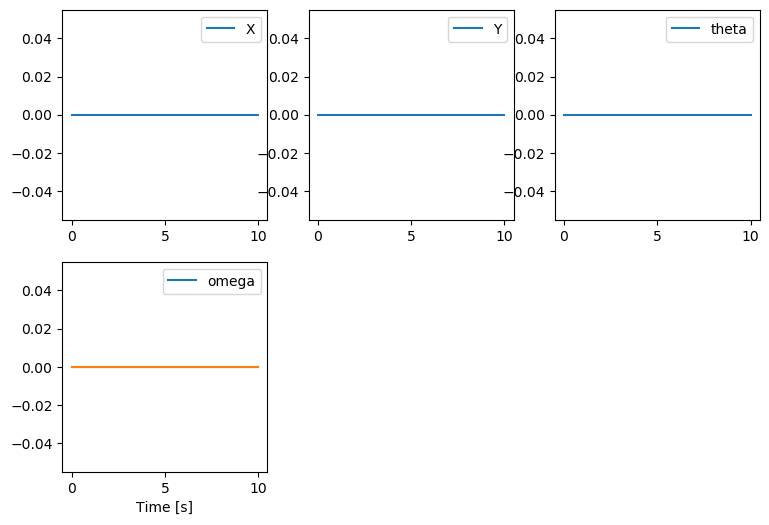

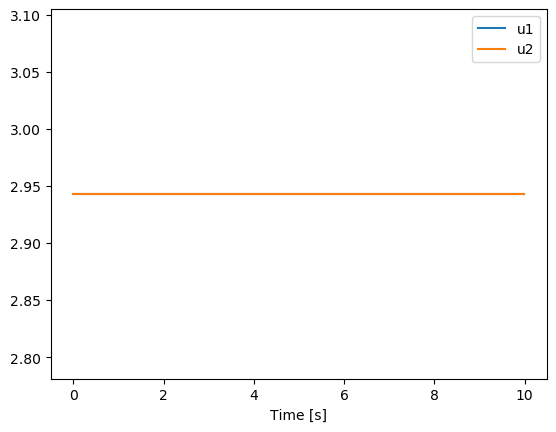

In [4]:
# we can simulate the robot but we need to provide a controller of the following form
def dummy_controller(state, i):
    """
        the prototype of a controller is as follows
        state is a column vector containing the state of the robot
        i is the index corresponding to the time step in the horizon (useful to index gains K for e.g.)
        
        this controller needs to return an array of size (2,)
    """
    # here we do nothing and just return some non-zero control
    u = np.array([0.3*9.81, 0.3*9.81])
    return u

horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, dummy_controller, horizon_length, disturbance = False)
show()


## Part 2 - LQR to stay in place
Now that we have $u^*$ capable of keeping the robot at rest, we can design a simple controller that ensures that the robot stays in place even when pushed around by random disturbances (e.g. due to the wind). Our task here will be to design a LQR controller that keeps the robot at a predefined position. Since the dynamics is not linear, we need to compute a linear approximation of it.
1. Linearize the dynamics at an arbitrary operating point $z^*$, $u^*$ and write the linearized system dynamics using the variables $\bar{z}_n = z_n - z^*$ and $\bar{u}_n = u_n - u^*$.
2. Write a function ```get_linearization(z, u)``` that returns the matrices A and B given a state $z$ and a control $u$ (use the constants defined in the ``quadrotor.py`` module).
3. Using the linearized dynamics, we can design an infinite horizon LQR controller of the form, $\hat{u} = K \bar{z}$ to stabilize the resting point. Write the equations of the controller in the original coordinates $u$ as a function of $z$.
4. Design an infinite-horizon LQR controller that stabilizes the origin $z=0$ and test it using the simulator below.
5. Explain your intended design in the report, including the cost function and found control law. In particular, verify that it can handle perturbations by calling the ```simulate``` function with ```disturbance = True``` (when setting disturbance to ``True``, the simulator will generate a random perturbation every 1 second). Simulate your controller for 10 seconds, plot the state evolution and show the animation (include the plots in your report).

In [5]:
### Task 2 

def get_linearization(z, u):
    th = z[4]
    u1 = u[0]
    u2 = u[1]
    
    A = np.array([[1, quadrotor.DELTA_T, 0, 0,           0,           0],
                  [0, 1,  0, 0, -quadrotor.DELTA_T*(u1+u2)*cos(th)/quadrotor.MASS, 0],
                  [0, 0,  1, quadrotor.DELTA_T, -quadrotor.DELTA_T*(u1+u2)*sin(th)/quadrotor.MASS, 0], 
                  [0, 0,  0,  1,          0,           0],
                  [0, 0,  0,  0,          1,           quadrotor.DELTA_T],
                  [0, 0,  0,  0,          0,            1]])

    B = np.array([[0,                    0     ], 
                  [-quadrotor.DELTA_T*sin(th)/quadrotor.MASS, -quadrotor.DELTA_T*sin(th)/quadrotor.MASS],
                  [      0,              0     ],
                  [quadrotor.DELTA_T*cos(th)/quadrotor.MASS,   quadrotor.DELTA_T*cos(th)/quadrotor.MASS],
                  [      0,              0     ],
                  [   quadrotor.DELTA_T*quadrotor.LENGTH/quadrotor.INERTIA,          -quadrotor.DELTA_T*quadrotor.LENGTH/quadrotor.INERTIA]])

    return A,B
    
N = 1000

def solve_LQR(A, B, Q, R, QN, N):
    '''
    A, B, Q and R are the matrices defining the OC problem
    QN is the matrix used for the terminal cost
    N is the horizon length
    '''
    list_of_P = [] # K will be from 1 to N-1
    list_of_K = [] # P will be from 1 to N

    list_of_P.append(QN)

    for i in range(N):
        
        k_temp1 = np.linalg.inv((np.matmul(B.T, np.matmul(list_of_P[i], B))) + R)
        k_temp2 = np.matmul(B.T, np.matmul(list_of_P[i], A))

        Kn = np.matmul(-k_temp1, k_temp2)

        p_temp1 = Q
        p_temp2 = np.matmul(np.transpose(A), np.matmul(list_of_P[i], A))
        p_temp3 = np.matmul(np.transpose(A), np.matmul(list_of_P[i], np.matmul(B, Kn)))
        Pn = p_temp1 + p_temp2 + p_temp3

        list_of_K.append(Kn)
        list_of_P.append(Pn)

    list_of_K.reverse()
    list_of_P.reverse()
    return list_of_P, list_of_K


def LQR_stabilize(state, i):

    z_s = np.array([0,0,0,0,0,0]).T
    # print('z_s = ',np.shape(z_s))
    u_s = np.array([m*g/2, m*g/2]).T
    # print('u_s = ',np.shape(u_s))
    Q = np.diag(np.full(6,1000))
    # print('Q = ',np.shape(Q))
    R = np.diag(np.full(2, 0.05))
    # print('R = ',np.shape(R))
    A, B = get_linearization(z_s, u_s)
    # print('A = ',np.shape(A))
    # print('B = ',np.shape(B))
    P, K = solve_LQR(A, B, Q, R, Q, N)
    # print('K = ', np.shape(K[0]))
    
    u = (K[i] @ (state - z_s)) + u_s

    return u

    

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABn8G1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAASMGWI
hAAQ//73gb8yy18iuslx+ed9LKzPPOQ8cl2JrrjQAAADAAADAAADAAYjEjf+h/F4zfwAAAMAALcA
GFAMIAqoDCop7v4n7qcQC2GTfPg0RWyJcNZnZIg+ms2iWsBb1ygUhAZBCiCTW6wKSTuAotxSMtmu
F6Ne0JRw9SOVthzL7K70lZCO9aS6cBU914O/IX20vFWMimi1psUwlNWhufuw0v9mYgT7Ser7mL/9
3+1bzHmP9ZZSbcPW2Hfgtv+WpGielLqPJWaGZ50R9TBoBBjQ014j03+vw7tYq/V3+AJ1oCXcaLzW
jfPbLXS1FZwgrSOMoFVS5OFn5CwcvSO64pixh6vHCq0OXEIN4i12uUsh7rwNZe/Ao7INgcRJxFhT
wEJVtgb4JQv0t8G8AUt0wqzHxoUvSAdhxnWhP62FWa6UKhPzVpR1cC81bElV4WjIcMipSB2FwsyO
e4UmOl5OQCbKvJC9y9LhXhO/AAfCYQJf174lD3/Rn5YB4ZOxKJm0WCyAGWBRAFukIiPR5HcOvFrk
8R7HcsMP5cCD00OzFbxxx7aX8VHTYhVMlpmalle1ZDl/cE/wC3LWS/fxx66VCxWF0mN7qDSXQGPp
eaNgEtLmna2FcGi8IOTnq1zBbSlcCafl9/aFdeYjka9zSsNpT2FkjcXMM2LXdM1iaRIN/VIrOeib
MPA70bG1y+Yiup9975Bcd6CIZ8zrde1PsoH9Ax7FV0SsM+DJoqQZ/xX42q837Jjz+eyN/YQXHabz
JjgDbSH+fO/GPQkYwt4eLvCvix/s8Gs+Y7jJp7n8qNI0SGJrOdTnfxR2n9U1JX7eDFi4P2dkCtO2
o++3jIvPf2sX0Sg8Au1FYQ3h3f2hq8aJj257PsoUc6K3BLJqRv48jfClvmGixocpFmwifOT0J9/s
9yEXN4sivt6AhKiYEL1V7b9ezHKeaZ3UQ1MAAAMAAAMAAAMAAAT+G2WUArTgkXbxtAI6eDOlC41Q
rK3gPkHDA6Tkh7/DwxsYaj7i6Zz/tc3jE+AhNf+/w/jFcrRyc+rxrfqgBH8k0Qzj5MFqlfjGP5v3
AH5XyXBPc7ajnohIZjHeGJCIUL0j1tQCH7/g6WI5Y3wvoLv9V1mHoNjhC9o8CUIVNEb3dUZB2ElF
A/+dZRoFP6r03BLXGRU4Q7lUTeP/mZgeDcwDsRGGa8Ci9AiFAg7ZZDRlgpCZ9CfxzpQyPAmzdoX3
h2m6GA2/TmnyJkU3hsJXiyDhZld9pNJDU80AvtMSQDVEEkBtHJVvf/yKxAGkhPmiIOuJdkox/1I6
Z/ntebMpUSAfJ3IYBiLA04C7ZANsMLaGYwAx5/lTZPvy77JxLVI0oUmMypkPTUcgQvwDWAAAAwAA
AwAAAwAAAwDINsc9M67lQ5RchbcN6cnpCg+HyaQQUQzEYuMw5YywFBoseTShU/1XKUPUaAInCbOk
5vy7B1Uu/xmUMvetp6Pa7J9D6MrQXvWqn6BtL48Ght+eNPMM2OWKtdFcSoJPTYKBfRZZS5kZOUM4
tynlceA+TGETG2CptdAILZJvQjTi2A+CtqX61eWO63QlDs3XGvI+8zk2nunAuOBcNOQhQHWCDipq
oFfDuNuTiRW5wM3C7W6mK4TlUDRjJGkxNL0wucseyx8CfZT94cZxoZV+4DJ2Mqrt1IQJT4370zNP
zyTgox1yR5J4ivv3cNp8ZWV0H7ZZvnZQHPfY/1rXNkDVwinF8VshmPRoj2PAxGAF/gBCutRRC2qx
+fDc31MJI0AGFZ4YOz/JMQ0yMpMaJlb4rfled/0O2QnDuMohghIIDHo/m2gQhfM4JW2ownSS8nu+
dtgoezf2o3TwoA9MIuAJGUOXvwmSGEl6G1FSFYZ7ej/WLUbQgOgknsAAAAMAAAMAAb9frLoh2PW3
s2SkWNz3ZVKWTk1TKPG0cRMfF/eBptfg/S6jM0GAfAEXZusLjuHSPLiG8e04uLfdcq5f8Hls92FN
8oe63uFmVteOoQRw/BMioHHhcheX4zGbnWcmn+SGCm4dQ/1bDp3UVGASbFXahqx/jHta6T2Dm8eP
nrVvc6h/s5SYSfVrsnZPYcGr9FGIYrQot9u/qHxle0cyqox4q408t+ie0VXyGAMA67d++ZVh/0Oa
8gjZpthIAA5W+8g2fJ4KLZsMJqGPoyw2eCW8NGKpTtZ0qSX4W0ysrSCBEGmEXC97/jL2hBaxz8+E
00ulizmj2HFQsf5P8NCok8dwHbLjaZtV3nu2hoX9VsubEf3/Wq2e2vwqGnr8K83SomkwFWZk3JpK
5loe6R++JOKaPYc8/QcLdjHrd+PXyqwrq0jFh51GqCcpph/Cfcvsf0I2DKT6IJlg5aurPBeVgz+6
zWHcp3Scabej7zYFhzemafH+qOOKN/sS1sQTNlO+MYb6pbjM7DWyJhosfDvdNTCmiHIt8FWAMUQ7
eW3FdtclGe8KAEkJ5hiCRg7ukUXlAe3KJe4EeWTOVsR9y0ZHQCV0jGm4S78wpHf7wmi7sWiaEHlZ
PQM2HylPvovncoJdgE7sRXaJ99XKsrulAGoy64rW6znwRcz06PzdsMRS2GYgnPHsW4oVtYk/Re7A
I3qj3+ddvn0WWGfj94ZkFUM9daO3NQTzHEAuV9KOeiydfkRO66skYfptGSGMj9X17LLn7xB9PXgA
e/J/81NmD2lyzgrFm7v796pCCkWO4AJmRd4U9YBZyuBDs33mb6KmHKnLaoEnW1Ikjx9N5xy3Cfcm
FdB8A0oDXPtrmWENxVJcnIZ//JarGb9DzVABlL+1PRmIrsx0yVEvWQ4AAAMAAAMCLIs/2Fzz2cCI
YhPGPk33TzZo+Or1PaesH1zP2nlYOAhA4tcoMeGZCIxmq64x5/M2EmDD1ZeoCHN3Rt/79mLa2Gxq
2rzTrA1JaRzEU3wbULrp2

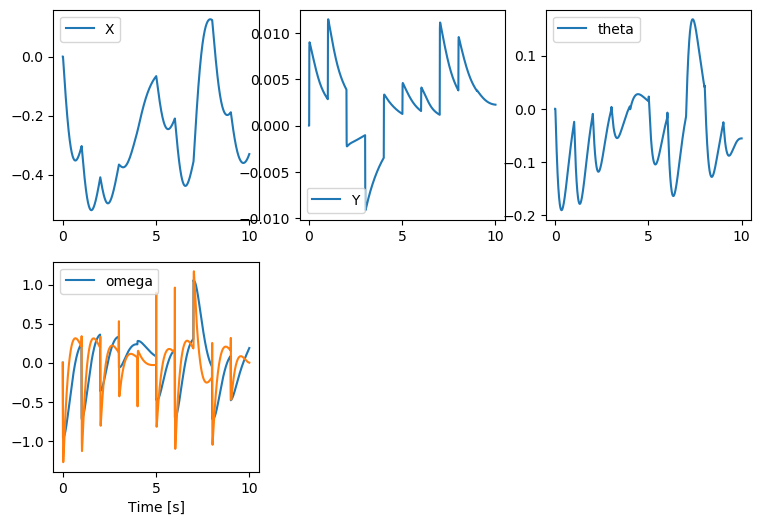

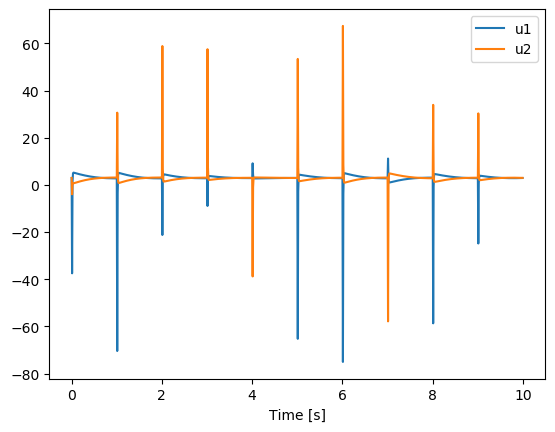

In [6]:
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, LQR_stabilize, horizon_length, disturbance = True)
show()

## Part 3 - following a trajectory using linearized dynamics
Now we want to follow a given trajectory leveraging a linearized version of the dynamics to design LQ controllers.
1. Assume that we want to follow a circle of radius 1 centered at (0,0) while keeping an orientation $\theta=0$, how does the linearization of the dynamics change along the desired trajectory? Why?
2. Design a tracking controller (using an LQ design with linear approximations) to follow this desired trajectory. Explain your design in the report. 
3. Test the tracking controller with the simulation (with and without the perturbations) and verify that you can indeed track the (x,y) trajectory very well. Are you able to also track $\theta$? (Explain) 
4. Analyze your results (including plots of the states, controls, etc). What benefits and issues do you see with this approach?
5. Is it possible to do the same thing while keeping a desired orientation of $\theta = \frac{\pi}{4}$? What might influence the results in this case?

In [7]:
def solve_LQR_trajectory(A, B, Q, R, x_bar, N):
   
    K_gains = []
    k_feedforward = []
    list_of_P = [] # K will be from 1 to N-1
    list_of_p = [] # P will be from 1 to N

    list_of_P.append(Q)
    list_of_p.append(-Q @ x_bar[:,-1])

    for i in range(N):
                
        ##Linear FeedBack
        K_temp1 = np.linalg.inv(((B.T @ (list_of_P[i] @ B))) + R)
        K_temp2 = np.matmul(B.T, np.matmul(list_of_P[i], A))

        K_n = np.matmul(-K_temp1, K_temp2)

        P_temp1 = Q
        P_temp2 = A.T @ (list_of_P[i] @ A)
        P_temp3 = A.T @ (list_of_P[i] @ (B @K_n))
        P_n = P_temp1 + P_temp2 + P_temp3

        K_gains.append(K_n)
        list_of_P.append(P_n)

        ##FeedForward
        k_temp1 = np.linalg.inv((B.T @ (list_of_P[i] @ B)) + R)
        k_temp2 = B.T @ list_of_p[i]
        k_n = np.matmul(-k_temp1, k_temp2)

        qn = np.matmul(-Q, x_bar[:,N-i-1])
        
        p_temp1 = qn
        p_temp2 = A.T @ list_of_p[i]
        p_temp3 = A.T @ (list_of_P[i] @ (B @ k_n))
        p_n = p_temp1 + p_temp2 + p_temp3

        k_feedforward.append(k_n)
        list_of_p.append(p_n)


    K_gains.reverse()
    k_feedforward.reverse()

    return K_gains, k_feedforward

In [8]:
def trajectory(state, i):       
    z_s = np.array([0,0,0,0,0,0]).T
    u_s = np.array([m*g/2, m*g/2]).T
    Q = np.diag(np.full(6, 1e+10))
    [Q[1][1], Q[3][3], Q[5][5]] = [1e+01, 1e+01, 1e+01] 
    # print('Q = ',  Q)
    R = np.diag(np.full(2, 0.001))
    A, B = get_linearization(z_s, u_s) 
    N = 1000

    x_bar = np.zeros((A.shape[0], N+1))
    th = 2*np.pi

    for j in range(N+1):
        
        x_bar_1 = np.array([np.cos(th*j/N), 0, np.sin(th*j/N), 0, 0, 0])
        x_bar[:,j] = x_bar_1


    K_gains, k_feedforward = solve_LQR_trajectory(A, B, Q, R, x_bar, N)

    u = (K_gains[i] @ state) + k_feedforward[i] + u_s 

    return u

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABknW1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAATdmWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw9AnFzBLajJC5kBgsZD+dDm3n1cO8h9Ywd/7
r078kbebMUh/vahTVmXhTD+xSuAVrLyUF4yRE9z4DL6L2GUIRpqZkZ2Ls0c8TnbwsKhJKplgwSJF
15+RTzKR+e0rR0rHgP7JDSyKkGk9s/8rR/yxJXqzguMh+vsyMCQqpOLZlRdcju6HUaQ8rgwp/HPS
tihwvaiVfZFWbfJHggHvSbsAP9r2pheuyIb+fsbqlSlxylzA8V+Rh/HlABJgolJedE0AwVFxpSm1
62WJuh2oBPDykETxwH4ohYzaXR7OqE2DkFObtxOwUCwfX9+oiq1WrXxD/ALctZL9/HH1FTfFouQH
+nJfkIgygECFHUeEyIEMOTbO08qQnPVrmC2k3e05fGSv/cSAV3y2OiUT1O3t0aSh2dUMzYtd0zWJ
pEgRbApWGa6WM6B3o2LuHhiDCB48saI7geLi3lA/oGPYquiVhtPNIB16Ap7e4ajUkacYvz2Rv7CC
438Hc6i3iQsP9CZEcetj5//hBronipqf6jIHjIzP5W2aG6P0aFn06AtKd6Z5Sb1SKObl8cZsyIkG
FsQne0spYsujDRgr9U0av7Ipsd6C7//9pAGpfX/tYvolB4AkeWZrZ/9GyTsyTxyNAroFan8Df/1+
mseZ8OylP17gRJCSKOt6SD4xpo6ccogDjo5nAwqbWVMoGhshtlmNp7aDPKn9k+cRWlR7ZE28jMeO
wq20CLkeF5HKbP985c8iv4FzgACHbbG8w8zVCwqOIKWgAAF8YAUhAA3exZzNz3pzUxMLqP9spRPB
nShcaoVlbsC24GAOk5Ie/w8MbHFY5TJdelqY2N3KfCE1/7/D+MVza5HZUZWxDI6lH8k0QzjyBrmC
vxjH837gD8r5LaLVI7WODe2HjHeGJCIUL0kTt/rX7/g6WI5Y3wvfCfi30kvz01kyhd33ATObJQOH
8DkulOv+GfGrHWUaJuaKXgAPocjJwh1Qe6eP/mZgeDcwOUJiLIvKOUTwuAirZlf4Ls5b9dKPjmFD
I8CbN2uwp66eCtwlaoJ3vy89u06sNboJeNGye1JXI4A8TeaMrqKRlP/AJu6DRmebH2XtaU9+JiOp
GYLYIusweS9/tzeyweYALNft+4TAdVxB2sJwP+iGWMQEhk7rkaatyeOQBW+aVTVza39WX/Jn4MHm
aLbukgq8XrM7eNNHaPglwLdMKBybAC6mFJeiv2A+jzum2NE4jzFR5oHTA4MWyTtG4A9grMJAnVNw
3LZyNHYIm23Bb0LGG6TWtFVNgAFtUUGPDWFlOqiSMMOEWOO+Cpt55KmXrkK2tOXp3BmJsRwG8taE
BzSg3P3Zaap3T/DtIjwvcvumAQCxytnjeUvfT3vO/W3W58KfmC3NqiHQyNNAy1CdnyXNQc/0BblR
f09kWlessa9VrSYV0WfUl/THVEC/xwATIoVMQ42NQEwINjXYeVHTGETG2B5/+YvmEBTCHsdbAfBW
2n9lwyb3dTSzhD9IUxkXrNgB0cpImtoW3PdfKbHdhLyIhKuxEhviH+Kk1EqOpCvZF/bhEIk7TF+g
3QUJPRlu2eI7Cna8+h+nZrxHVRHNgu3yb1CkUyVCLgGc4QIQ4+OC0FIf//pYLgb/VFpnNI3fVk3C
BkDm6dY6iP+Im6TVvwtoJU8NN6t2aX1XqbFC6J/lFcOaR0NxdwOYe/Ae6tMoHvIcduqvN4Hpx+lM
m7/4lcvRx76Oz2SnIqsx8IdkIc/CM+e0eVeuf584e1EtfSJRmk68W6jJFg02aRAGZH0dVKfcTqe7
VCL+l8qwDK6S73ghIIDHo/m2gVl+gACVtqMJ0ktNBcfIkI6jYoPs1gQLxJJrf1fPCX0K3rxiT1oV
/KbLJmgdii8LdG4qEoO7gTxTUIAAFAEPAxL7FjbQk8ACRb4U8ekb4vJSACpMXabazjjCQQi8+q5Z
DT6+lKag4YUcMIR9jUH3v0basNZgV/Ss278AwXdXErPno6W4jzmimalR8A6iV/ENj1uLEtcIyc5N
ulMz8+cw9kE/RXuk/GVQ8n5nnmI3i6xHAXwGirM1R1umxlQHbCXW366rSFlHMqqMeXRp9qdGtnn6
zT3WUZAB+ORIv7rJOr6kkpLawyVTXSjhXUohtLiG4TaCf79EBW0LtTS09Z0qM69t9J0N2oGHLZV/
uw0ORuigt78BgpppcpyYqhupV/Zs9gugWC054/VV1RgqnmjeeIm+iR4K4urL3XsjpeNKQyu706uT
vWKdBTsVo3hsKt22h3YdXx/eDVXTpcMfefsnVpdfYIyCfmmw7aWk5kKg4NTAR2fpqQ/DolWa/Xa4
oBfqgadVCz/A2zhYg+lh38JrBydEhfw8m3cTjArf30QsNa7Szj8vgi2beTLd3RyT4hcfoDhmmaM/
ZzID2eUNiLKeBbmBVMBZfmTjCqqL+3XwomNSMpaQcqcHxCqbdOb7TIi1Z5RVbNjqU6VH9F/oM+DI
dDz+9gD2TAIwpyVxZcSjIQLvX28JmNb9+VwClLcw+o3CjIVJH7FLz2f+EIfGpEVxVAePKCzac9xq
JTxuv1NEZqCTwt4nIAV0o

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAB28G1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAATHGWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw9AnFzBLajJC5kBgsZD+dDm3n1cO8h9Ywd/7
r078kbebMUh/vahTVmXhTD+xSuAVrLyUF4yRE9z4DL6L2GUIRpqZkZ2Ls0c8TnbwsKhJKplgwSJF
15+RTzKR+e0rR0rHgP7JDSyKkGk9s/8rR/yxJXqzguMh+vsyMCQqpOLZlRdcju6HUaQ8rgwp/HPS
tihwvaiVfZFWbfJHggHvSbsAP9r2pheuyIb+fsbqlblxymzA8V+Rh/HlABJgolJedE0AwVFxpSm1
62WJuh2oBPDykETxwH4ohYzaXR7OqE2DkFObtxOwUCwfX9+oiq1WrXxD/ALctZL9/HH1FTfFouQH
+nJfkIgygECFHUeEyIEMOTbO08qQnPVrmC2k3e05fGSv/cSAV3y2OiUT1O3t0aSh2dUMzYtd0zWJ
pEgRbApWGa6WM6B3o2LuHhiDCB48saI7geLi3lA/oGPYquiVhtPNIB16Ap7e4ajUkacYvz2Rv7CC
438Hc6i3iQsP9CZEcetj5//hBronipqf6jIHjIzP5W2aG6P0aFn06AtKd6Z5Sb1SKObl8cZsyIkG
FsQne0spYsujDRgr9U0av7Ipsd6C7//9pAGpfX/tYvolB4AkeWZrZ/9GyTsyTxyNAroFan8Df/1+
mseZ8OylP17gRJCSKOt6SD4xpo6ccogDjo5nAwqbWVMoGhshtlmNp7aDPKn9k+cRWlR7ZE28jMeO
wq20CLkeF5HKbP985c8iv4FzgACHbbG8w8zVCwqOIKWgAAF8YAUhAA3exZzNz3pzUxMLqP9spRPB
nShcaoVlbsC24GAOk5Ie/w8MbHFY5TJdelqY2N3KfCE1/7/D+MVza5HZUZWxDI6lH8k0QzjyBrmC
vxjH837gD8r5LaLVI7WODe2HjHeGJCIUL0kTt/rX7/g6WI5Y3wvfCfi30kvz01kyhd33ATObJQOH
8DkulOv+GfGrHWUaJuaKXgAPocjJwh1Qe6eP/mZgeDcwOUJiLIvKOUTwuAirZlf4Ls5b9dKPjmFD
I8CbN2uwp66eCtwlaoJ3vy89u06sNboJeNGye1JXI4A8TeaMrqKRlP/AJu6DRmebH2XtaU9+JiOp
GYLYIusweS9/tzeyweYALNft+4TAdVxB2sJz3+SdGn8aak7rkaatyeOLaHok6q2upnvw/qVbYKf8
p9HKBrpbxesLt4h7BI+A7DVx9gVfoArJhTipr8hlWISxyvjTo2I6OaB0waFdPE7RuAPZSzCQJ1TZ
9y2cjR2CJrH367P4obpNa/LABIAA6GV0WApnM343s4SeMkfP5OKUOOSpl65CtzTlQdwZibEcBvLW
hAbMoNz92Wmqd0/w62I8L3L7pgEAscrBK/lL31D/tp7AvYxHhVD+yirKMvGmgZahOz5LmoOf4N/a
/f09kWlessa9VrSYVyPKkpWWn2/xbxwATIoVMQ42NQEyIJDXYeVHTGETG2B3r+YvmEBTCH4FbAfB
W2n9Nwyb3dTSzhD9IU1kXrNgB0cpImsI7BeArww+ueTseoXTL8Zr2lV8k1EqOpCvZF/bhEIk7TGC
gywUJPRlu2eI7Cna82h+nZry+1RHNg+3z71CkWPrhLhEiYg47ZJ5NnbEf/0rwYiTUrPO5PNY3H3P
dRZIFHICCH+VjVTG2K9tBKdBZnd/66/ADTYojCf693uhK2uJUnoiD8Z1/xUU5ExFygK5y8dju+Bw
RDxLlf6NPfR764uULoEopKj9OSAxYWDBHDqp/SP2DXbw/pE1TSclgX81kiH8ewZcu00TGFzngo6I
cj6zFSj4TdvqIXKMl3CAGZFVQEaf8gRBdJFZUkuPyY5T0zeMMgH2awIF4kk1h6vlRrOBYI0tjDEi
3xEanDUAiweFXrWmUudZQe7N6USbGgAAhZZRcYsRMGRLN6+O8+xkFPW0SCktsWipuvn4q+u6fX0p
TUHDCit7YudY1SMWcYKpHMT9CDmGn2h+LSJW6CvOgI+wfPDhXCr4dmXoGXxDWG+0Dn2n0qAv6YYo
E6UQ5r2pvlKRd+Ax0Y7ugyy/ntWzeu8hEcpmPdPNtJRCeTqX0ee2aFAd3bsjvt5iZzpOuj6EEIp4
hE6NbPP1mnusoyCucbHgMTj+6s+qQfgJxYtSFgxhx8cTVy0aFcQT/uoev6Y8YqlO1nSozr22JYJM
igYQtn7XzAwoVhEVrHPz4TTS5j9TIs6+QD6s9gugWC054/VV1RgbnWOjHsvCYN61NgZjQ+ufwGJF
707gHIl90jgwoDc9t3nj6IgzvvLi8BnVC1ltusToKvyn+oMhqImW0ij79a87UfMpnkui9OHTEr8V
SJP0H22mQNPhzeefWYseu7JfvU+A7i1lk+RiVy3e1ESAK5A252jgW2G7KOGOVXCbcXPFCH3qZggL
S9lpOsXCAB0Y6rpwfJiZHSFZmTGtxwzpc0sMdmn6BMW8jLNZHyvP8SzdFw6N9cggTrdP8tLVlNCq
9qjBua3u3m/mlpvi2KgdMyjybmkEKFcN+f8om30cG5RmuC7OnKbcPRoHRej3mAQjuK9HjS1C5A6P
6hbsGcinWd/TB/IQ0HupJ

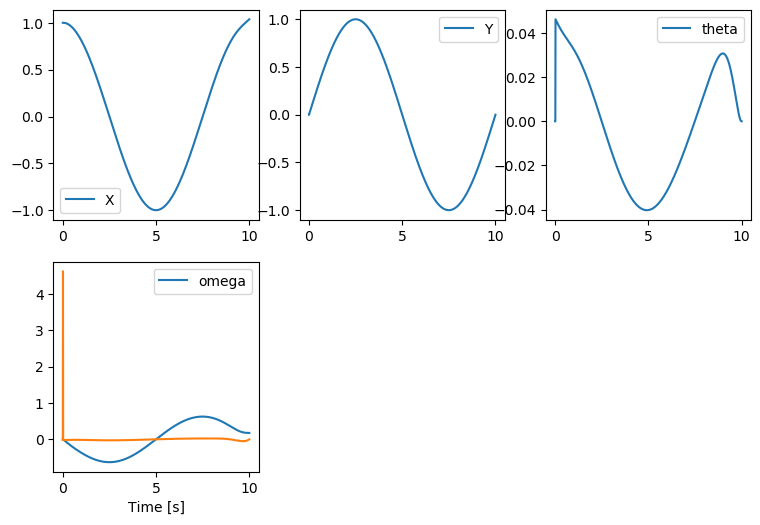

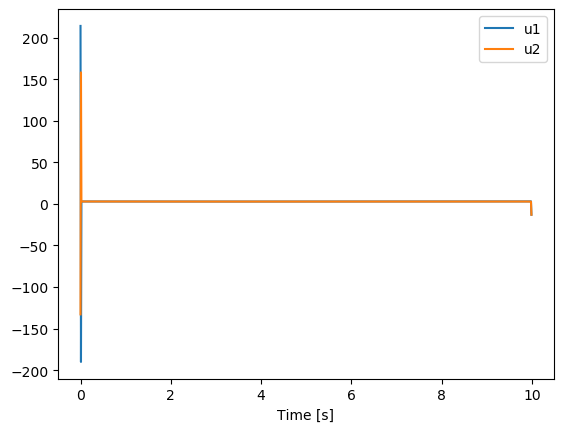

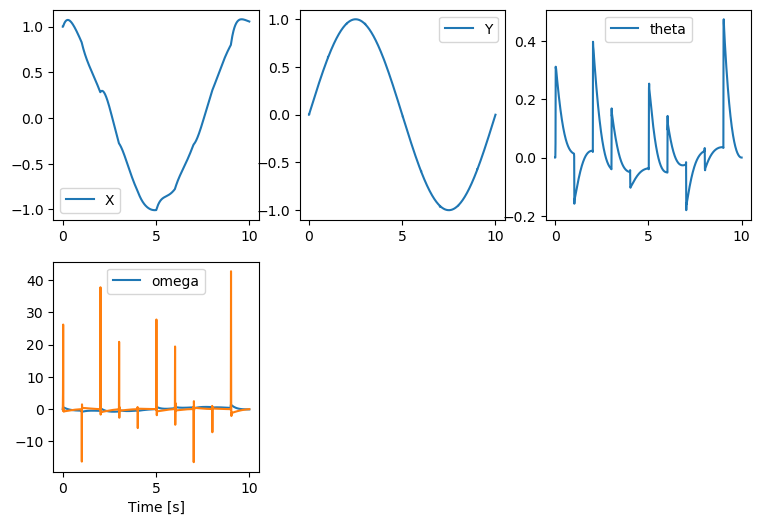

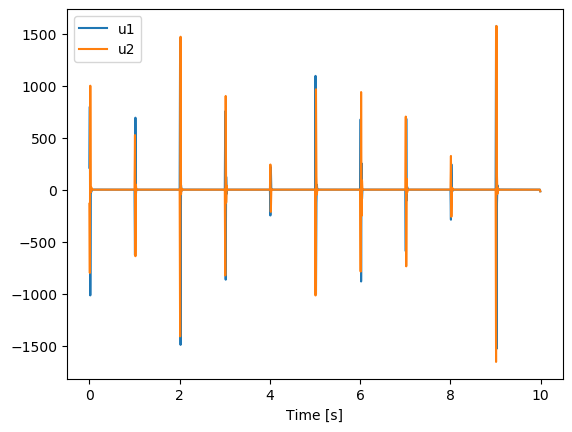

In [9]:
horizon_length = 1000
z0 = np.array([1., 0., 0., 0., 0., 0.])
t, state, u = quadrotor.simulate(z0, trajectory, horizon_length, disturbance = False)
show()
t, state, u = quadrotor.simulate(z0, trajectory, horizon_length, disturbance = True)
show()

## Part 4 - iterative LQR
Now we would like to do more complicated motions with the robot, like a flip. In this case, we do not have a prescribed trajectory but we would like to compute a locally optimal trajectory while we optimize the controller. We will use the *iterative LQR* algorithm to solve this problem.
### Task 1 - reaching a vertical orientation
In the first task, we want the robot to reach a vertical orientation $\theta = \frac{\pi}{2}$ at the location $x=3$ and $y=3$ at time $t=5$ starting from $z_0=0$. During the rest of the motion, the robot should try and stay close to the origin. It should also try to keep its control $u$ close to the control needed to keep the robot at rest. We want to make sure the robot reaches the origin $z=0$ at the end of the movement. 
1. Find a time-varying cost function that promotes such a behavior (use only quadratic/linear terms for simplicity). Assume $T=10$ seconds.
2. Write a function ```compute_cost(z,u, horizon_length)``` that returns the cost of a trajectory z with control trajectory u (using the cost function you wrote in question 1).
3. Compute the quadratic approximation of your cost function along an arbitrary trajectory of states $z_n$ with control trajectory $u_n$ (this is not just your cost function!)
4. Write a function ```get_quadratic_approximation_cost(z, u, horizon_length)``` that returns the quadratic approximation (Hessian matrices and Jacobians) of the cost function when approximated along the trajectory z with control trajectory u.
5. Write the iLQR algorithm that solves the problem using the functions written above. DO NOT FORGET the line search step at each iteration. For the line search, start with $\alpha = 1.$ and decrease it by half when the cost does not improve (you can stop when $\alpha < 0.01$).
6. Test the algorithm using as initial guess $u$ such that the robot is at rest (using the results of Part 1.2). Analyze your results (probably you will need to "tune" your cost function), plot the initial and final state and control trajectories, show the animation. Use the simulation without perturbations for simplicity. 
7. What benefits and issues do you see with this approach?

In [10]:
### Task 1

def compute_cost_ninety(z, u, horizon_length):
    
    back_pass = np.array([0,0,0,0,0,0]).T
    part2 = np.array([3,0,3,0,np.pi/2,0]).T
    part3 = np.array([0,0,0,0,0,0]).T
    u_des = np.array([m*g/2, m*g/2])
    
    J = 0

    for i in range(horizon_length):

        R = np.eye(quadrotor.NUMBER_CONTROLS)

        if i<350:

            Q = np.diag([5, 2, 5, 2, 2, 2]) 
            z_des = back_pass
            
        elif i>350 and i<500:
            
            Q = np.diag([100, 2, 100, 2, 200, 2])
            z_des = part2
            
        elif i>500 and i<650:

            Q = np.diag([200, 2, 200, 2, 100, 2])
            z_des = part3
            
        else:

            Q = np.diag([5, 2, 5, 2, 2, 2])
            z_des = part3

        J_1 = np.matmul(np.transpose(z[:,i] - z_des), np.matmul(Q, (z[:,i] - z_des)))
        J_2 = np.matmul(np.transpose(u[:,i] - u_des), np.matmul(R, (u[:,i] - u_des)))
        J_ = J_1+J_2
        J += J_
    
    
    J_T = (np.transpose(z[:,-1] - part3)) @ (Q @ (z[:,-1] - part3))   # Terminal cost
    J += J_T

    return J

In [11]:
def get_quadratic_approximation_cost_ninety(z, u, horizon_length):   
    
    back_pass = np.array([0,0,0,0,0,0]).T
    part2 = np.array([3,0,3,0,np.pi/2,0]).T
    part3 = np.array([0,0,0,0,0,0]).T
    
    A_array = []
    B_array = []
    Q_array = []
    R_array = []
    q_array = []
    r_array = []
    
    u_star = np.array([(m*g/2), (m*g/2)]).T
    R = np.eye(quadrotor.NUMBER_CONTROLS)

    for i in range(1000):
        
        A,B = get_linearization(z[:,i],u[:,i])
        
        if i < 350:
            
            Q_diag = [5, 2, 5, 2, 2, 2]
            Q = np.diag(Q_diag)            
            r = R @ (u[:,i]-u_star)
            q = Q @ (z[:,i]-back_pass)
            
        elif i >350 and i < 500: 
            
            Q_diag = [100, 2, 100, 2, 200, 2]
            Q = np.diag(Q_diag)
            r = R @ (u[:,i]-u_star)
            q = Q @ (z[:,i]-part2)
            
        elif i > 500 and i < 650:
            
            Q_diag = [200, 2, 200, 2, 100, 2]
            Q = np.diag(Q_diag)
            r = R @ (u[:,i]-u_star)
            q = Q @ (z[:,i]-part3)
            
        else:  
            
            Q_diag = [5, 2, 5, 2, 3, 2]
            Q = np.diag(Q_diag)
            r = R @ (u[:,i]-u_star)
            q = Q @ (z[:,i]-part3)
 
    
        A_array.append(A)
        B_array.append(B)
        Q_array.append(Q)
        q_array.append(q)
        R_array.append(R)
        r_array.append(r)

    q = Q @ (z[:,-1]-part3)
    
    Q = np.diag([5, 2, 5, 2, 2, 2])
    
    Q_array.append(Q)
    q_array.append(q)
    
        
    return A_array, B_array, Q_array, R_array, q_array, r_array


In [12]:
def back_pass(A, B, Q, R, q, r, N):
    
    K_array = []
    k_array = []
    P_array = []
    p_array = []

    QN = Q[-1]
    qn = q[-1]

    P_array.append(QN)
    p_array.append(qn)
    
    A.reverse()
    B.reverse()

    for i in range(N):

        K = - np.linalg.inv(((B[i]).T @ (P_array[i] @ B[i])) + R[N-i-1]) @ ((B[i]).T @ (P_array[i] @ A[i]))
        
        P = Q[N-i-2] + ((A[i]).T @ (P_array[i] @ A[i])) + ((A[i]).T @ (P_array[i] @ (B[i] @ K)))

        K_array.append(K)
        P_array.append(P)
                
        k = np.matmul(- np.linalg.inv(((B[i]).T @ (P_array[i] @ B[i])) + R[N-i-1]), ((B[i]).T @ p_array[i]) + r[N-i-1])
        
        p = q[N-i-2] + (A[i]).T @ p_array[i] + ((A[i]).T @ (P_array[i] @ (B[i] @ k)))

        k_array.append(k)
        p_array.append(p)
        
    K_array.reverse()
    k_array.reverse()
    
    return K_array, k_array

In [13]:
def new_control(z, u, K, k, alpha, horizon_length):
    
    u_new = np.zeros_like(u)
    z_new = np.zeros_like(z)

    z_new[:,0] = np.array([0, 0, 0, 0, 0, 0])

    for i in range(horizon_length):
        
        u_new[:,i] = K[i] @ (z_new[:,i]-z[:,i] ) + alpha*k[i] + u[:,i]
        z_new[:,i+1] = quadrotor.get_next_state(z_new[:, i], u_new[:,i])

    z_new = z_new
    u_new = u_new
    
    return z_new, u_new



In [14]:
def get_u_star(compute_cost, get_quadratic_approximation_cost):

    N = 1000
    z0 = np.array([0, 0, 0, 0, 0, 0])
    u_star = np.ones([quadrotor.NUMBER_CONTROLS, N])
    z_star = np.zeros([quadrotor.NUMBER_STATES, N+1])

    alpha = 1.0
    ctr = 0

    while(1):
        ctr += 1
        z_star[:,0] = z0
        for i in range(N):
            z_star[:, i+1] = quadrotor.get_next_state(z_star[:, i], u_star[:,i])

        J_prev = compute_cost(z_star, u_star, horizon_length=N)

        A, B, Q, R, q, r = get_quadratic_approximation_cost(z_star, u_star, horizon_length=N)

        K_gains, K_feedforward = back_pass(A, B, Q, R, q, r, N)      

        for epoch in range(100):
            z_star_new, u_star_new = new_control(z_star, u_star, K_gains, K_feedforward, alpha, horizon_length=N)
            J_new = compute_cost(z_star_new, u_star_new, horizon_length=N)
            if J_new > J_prev:
                alpha = alpha/2
            else:
                break
        
        u_star = u_star_new
        z_star = z_star_new

        if J_prev - J_new <= 0.01:
            break

        J_prev=J_new
        alpha = 1.0

    return u_star



In [15]:
u_star = get_u_star(compute_cost_ninety, get_quadratic_approximation_cost_ninety)

def fly_high(state, i):

    return u_star[:, i]

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAB1tW1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAS02WI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXhPAjonQzhXeMs5KHv+5doesBCjs+7hYAAXQAAAYE/1y9HkfJOid5USB
nE5YYfy4EHprwfS3jjj20v4qPWxCqZLTM1LK9qx+5+4J/gFuWsl+/jj107CVouQH+nJfkJ89Llvg
2AS0uadrYV6aLwg5OerXMFtKYAJp+X39oV15iPS0BN6Vhs/Wr2Y50YxuFTcb0Q+jCQbqBhWc9E2Y
eB3o11/l6+gGNTbS4RuQ7dBRU+4Xg8tk/yeerLQoi6JWGhAuC7H9wWv5tas1nzBCMgDae2gzyqDB
70/WYwCr+xQWV18X9Hd4PHU5+KU39RkDxkZn8rVEMkBpmiQLQoS9eZtwX29k7Vtft4M0mdUtUYOA
R+WTxNuM9/axfRKDwC6Lso6v7ZLJgNMZ75TqtjUEO50Bsvvh51mjL+vI3mS3yLKZx5BmC5Wohx/P
u/4MV5KaaKm21cxpGziwJVMbgdx5HKeaM8ERSRJH32KJAAADAAADAAADAAAFOitllAK02sXifhQC
OngzpQuNUKyt3x2jzgOk5Ie/w8MbGGnm4umc/7XN19PgITX/v8P4xXK0TcmjzjhHAc8RLhDyC7Ld
BJX4xj+b9wB+V8lwX3O1onZ2Ama7GsG6y6lk5uEIKAHUYC1dFOeeYv/OpDToh6+OjcOraKypNa+5
jbWf0/13uvhO/hI2RxvdAsmhD2hkt4/+ZmB4NzAOa2xJrzxrorC4DWUlgtWFaE1Xg3jnShkeBNm7
Vkeqr96hDcVMqPImRTeGwleLIO8lU3wr/kNVsKw+0xJANUQSQG3Lh1WP/Aq/YNck+eSTYpdj/yzW
l2FCEMN3W7gNAD5PFxyyFAShfe2QDbBe2hmMAMef5V2eFXoaFOMXBPEYZSxTOHKafnfip6LegD5O
ZAkAAG7d3LMH/fFUIBEiZCSQAPklkiEAG/KYO0BBQjIiPX15QOUXIW3DenJ6QoOLTwkEFEMxGLjM
OU0sBQaLHk0oVQ71BvB6jHiJ5TZ0nN+XYOql3Yz+xLmu4Ws5YZk03NFUvWaGEb8DxS+LX7mNOjeI
g1GYyEG4O1O9LFEVBxhMQ42NRjj/lmh37YrqMImNsGXNs2QWyTeiDxgPgoXjHwyb3dTSzhD9KM12
MNN752bP1vYAsW9Xtt8/714Cr+3pyW6IE1Bw7+M9YAAYT9f0l2B0ULMiEUSZ2UBz3uZUC5YZO2Sb
BGCM0lTJSXnpPksokrdJbq8PsFkjFOnpNt2WPuLfjjvizgXOONPg+uYhgmmNdjKOtkEkbiMjj66U
hy9TLP6/k+vBOYa2+McvfW5Fdl8yLA+YSm1/N/X+SEYneb46xUGK3xLFOWBbDMqYq8T7v4vf8d0B
Cju82wQG6IaQ50asdogx0hu0UFpi510GqPbbiqeBnDJsxUSiSnZohAlvbWJk8Dyv1WZG8yfgAAsc
XQ5U2L6oAADwjcHQ2SXnAA5Y2scfE+tZkPk76bPy2OLv6japU08vikCb4UC/Qdx3LGQSZk7ideRe
EBZXfVDTH9SPfbjs1+hKveHVq/Y5F4JBpzMbjDORFBYBjfreUPT1CC4gI9rbHANaVFgAvwBN67xY
yXz7zElgyYsBVL0bAmHT67GSTetzjkNHmBlE7+1hGdb+xXHekViKcJq43UYuGnIc0jMYsXEkVZ0/
l9ieC5/FepkS7k1hu6YNwZWCDMciL0bcMD38qGP9qcePHMpvxm2pdYnYZ+MlybARUVfxlgLQ8qmq
P+XlQ2xB14Pezyni4WiZ3VWyTkThmHIDDkrfSYPMFcHB5NOc88gFTkddQtsWmyiavxbS/dZdYAHw
0eCM1ZkKmf2Q6sEuy2LzsrevrqKQt/rDJF9rxBpdHk5DhHfJr8/1n7GgvvQaw9EQsLovOeiKRccP
mmHh6gHvv1Pe1+p0w08T0NCX7i38XlnVeGlIpkIt/c/lUtNSnSuI+To0mxISjPCZZXhspQExaBJu
LTd6UWuGld1MdFSHc1VY7s6XzcoazIBV0ndylaDjY20tTNvXLGwg5ynsilN0veH0hb7TnOTJkZfu
vFESFRYUdpYhTXRUi/7TI2Mv+hr+c7wRrHQfmyda7bfBkQSSNvpv6t3W2+kb7ZxZiEeNc0FAV0xV
hOD+g3Imk8O0UDpeu26MWtUCPjJLfhDG/nfIup2SbgajS0A1RQAkrXxzhOxFQeRvShgJk57P9BOm
ZkvCa325WTg8qEMw9hkFzVsB3P4VsMHHAP5OKFxaBGXsi+Nu/Kr2qA7rxR1tTaMkMZH6vr2Y3z7u
OkHTcQ9+T/4Z1csXKX9n2hj7FpiZMtJDrF+Eb1Qg74VpJaY6oxbVqxKHIy9osnaY2Pe3LTQnzJhk
JcKAuevu0UNikFdw88ByQViPD4BKLGeO6CO5r26xeCanmsDSszAakAR2XF91TZKByNXEmTlCZ59E
TfK9SyAAAAka72vyha+q6

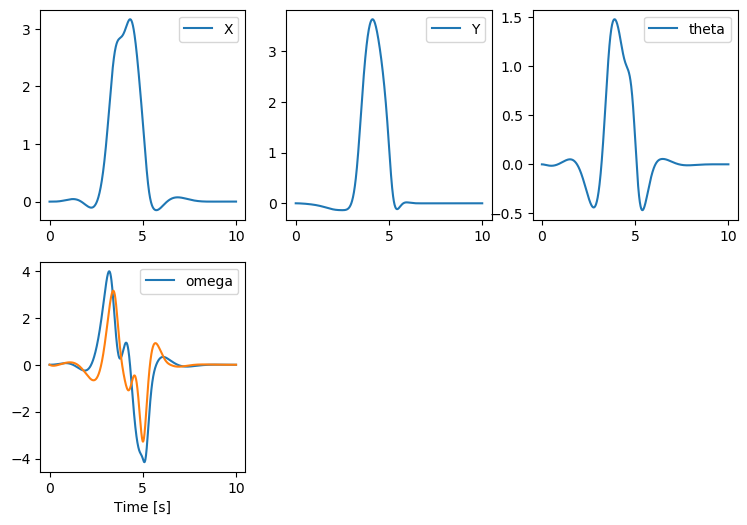

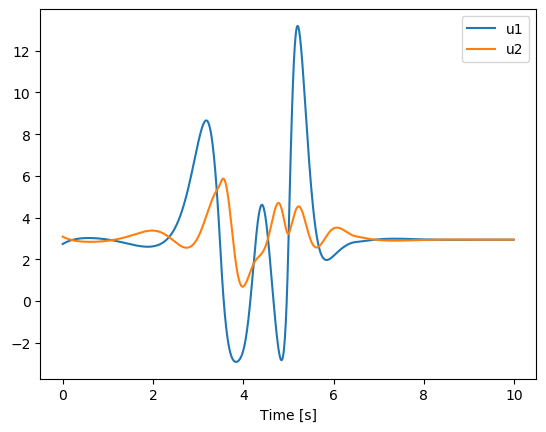

In [16]:
t, state, u = quadrotor.simulate([0, 0, 0, 0, 0, 0], fly_high, N, disturbance = False)
show()

### Task 2 - doing a full flip
In the second task, we want the robot to do a full flip, trying to reach the upside-down state $x=1.5$, $y=3$ and $\theta = \pi$ at $t=5$ and upright state $x=3$, $y=0$ and $\theta = 2\pi$ at $T=10$.
8. Use iLQR (and a new cost function) to get the quadrotor to perform the task. Analyze your results. 
9. What benefits and issues do you see with this approach? Could you run the resulting controller on a real robot?

In [17]:
### Task 2

def compute_cost(z, u, horizon_length):
    
    part1 = np.array([0,0,0,0,0,0]).T
    part2 = np.array([1.5,0,3,0,np.pi,0]).T
    part3 = np.array([3, 0, 0, 0, 2*np.pi, 0]).T

    u_star = np.array([(m*g/2), (m*g/2)])
    
    J = 0
    R = np.eye(quadrotor.NUMBER_CONTROLS)
    
    for i in range(horizon_length):


        if i <= 350:
            Q = np.diag([5, 2, 5, 2, 2, 2]) 
            z_star = part1
            
        elif i > 350 and i <= 600:
            Q = np.diag([100, 2, 100, 2, 200, 2])
            z_star = part2
            
        elif i > 600 and i <= 700:
            Q = np.diag([200, 2, 200, 2, 100, 2])
            z_star = part3
            
        else:
            Q = np.diag([5, 2, 5, 2, 2, 2])
            z_star = part3

        J += (z[:,i] - z_star).T @ Q @ (z[:,i] - z_star) + (u[:,i] - u_star).T @ R @ (u[:,i] - u_star)
    
    # Terminal cost
    J_T = (np.transpose(z[:,-1] - part1)) @ (Q @ (z[:,-1] - part1))
    J += J_T

    return J


In [18]:
def get_quadratic_approximation_cost(z, u, horizon_length=1000):   
    
    u_star = np.array([(m*g/2), (m*g/2)]).T

    part1 = np.array([0,0,0,0,0,0]).T
    part2 = np.array([1.5,0,3,0,np.pi,0]).T
    part3 = np.array([3,0,0,0,2*np.pi,0]).T
    
    A_array = []
    B_array = []
    Q_array = []
    R_array = []
    q_array = []
    r_array = []
    
    R = np.eye(quadrotor.NUMBER_CONTROLS)
    
    for i in range(1000):
        
        A,B = get_linearization(z[:,i],u[:,i])
        
        if i <= 350:
            Q = np.diag([5, 2, 5, 2, 2, 2])  
            r = R @ (u[:,i]-u_star)
            q = Q @ (z[:,i]-part1)
            
        elif i > 350 and i <= 600:
            Q = np.diag([100, 2, 100, 2, 200, 2])
            r = R @ (u[:,i]-u_star)
            q = Q @ (z[:,i]-part2)
            
        elif i > 600 and i <= 700:
            Q = np.diag([200, 2, 200, 2, 100, 2])   
            r = R @ (u[:,i]-u_star)
            q = Q @ (z[:,i]-part3)
            
        else:
            Q = np.diag([5, 2, 5, 2, 2, 2])
            r = R @ (u[:,i]-u_star)
            q = Q @ (z[:,i]-part3)
 
    
        A_array.append(A)
        B_array.append(B)
        Q_array.append(Q)
        q_array.append(q)
        R_array.append(R)
        r_array.append(r)

    q = Q @ (z[:,-1]-part3)
    
    Q_diag = [8, 2, 8, 2, 4, 2]
    Q = np.diag(Q_diag)
    
    Q_array.append(Q)
    q_array.append(q)
    
        
    return A_array, B_array, Q_array, R_array, q_array, r_array


<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAB30m1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAASxmWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXhPAjonQzhXeMs5KHv+5doesBCjs+7hYAAXQAAAYE/1y9HkfJOid5USB
nE5YYfy4EHprwfS3jjj20v4qPWxCqZLTM1LK9qx+5+4J/gFuWsl+/jj107CVouQH+nJfkJ89Llvg
2AS0uadrYV6aLwg5OerXMFtKYAJp+X39oV15iPS0BN6Vhs/Wr2Y50YxuFTcb0Q+jCQbqBhWc9E2Y
eB3o11/l6+gGNTbS4RuQ7dBRU+4Xg8tk/yeerLQoi6JWGhAuC7H9wWv5tas1nzBCMgDae2gzyqDB
70/WYwCr+xQWV18X9Hd4PHU5+KU39RkDxkZn8rVEMkBpmiQLQoS9eZtwX29k7Vtft4M0mdUtUYOA
R+WTxNuM9/axfRKDwC6Lso6v7ZLJgNMZ75TqtjUEO50Bsvvh51mjL+vI3mS3yLKZx5BmC5Wohx/P
u/4MV5KaaKm21cxpGziwJVMbgdx5HKeaM8ERSRJH32KJAAADAAADAAADAAAFOitllAK02sXifhQC
OngzpQuNUKyt3x2jzgOk5Ie/w8MbGGnm4umc/7XN19PgITX/v8P4xXK0TcmjzjhHAc8RLhDyC7Ld
BJX4xj+b9wB+V8lwX3O1onZ2Ama7GsG6y6lk5uEIKAHUYC1dFOeeYv/OpDToh6+OjcOraKypNa+5
jbWf0/13uvhO/hI2RxvdAsmhD2hkt4/+ZmB4NzAOa2xJrzxrorC4DWUlgtWFaE1Xg3jnShkeBNm7
Vkeqr96hDcVMqPImRTeGwleLIO8lU3wr/kNVsKw+0xJANUQSQG3Lh1WP/Aq/YNck+eSTYpdj/yzW
l2FCEMN3W7gNAD5PFxyyFAShfe2QDbBe2hmMAMef5V2eFXoaFOMXBPEYZSxTOHKafnfip6LegD5O
ZAkAAG7d3LMH/fFUIBEiZCSQAPklkiEAG/KYO0BBQjIiPX15QOUXIW3DenJ6QoOLTwkEFEMxGLjM
OU0sBQaLHk0oVQ71BvB6jHiJ5TZ0nN+XYOql3Yz+xLmu4Ws5YZk03NFUvWaGEb8DxS+LX7mNOjeI
g1GYyEG4O1O9LFEVBxhMQ42NRjj/lmh37YrqMImNsGXNs2QWyTeiDxgPgoXjHwyb3dTSzhD9KM12
MNN752bP1vYAsW9Xtt8/714Cr+3pyW6IE1Bw7+M9YAAYT9f0l2B0ULMiEUSZ2UBz3uZUC5YZO2Sb
BGCM0lTJSXnpPksokrdJbq8PsFkjFOnpNt2WPuLfjjvizgXOONPg+uYhgmmNdjKOtkEkbiMjj66U
hy9TLP6/k+vBOYa2+McvfW5Fdl8yLA+YSm1/N/X+SEYneb46xUGK3xLFOWBbDMqYq8T7v4vf8d0B
Cju82wQG6IaQ50asdogx0hu0UFpi510GqPbbiqeBnDJsxUSiSnZohAlvbWJk8Dyv1WZG8yfgAAsc
XQ5U2L6oAADwjcHQ2SXnYTwFVwroyTK93Xh7J302flscXf1G1Spp5fFIE3woF+g7juWMgkzJ3E68
i8ICyu+qGmP6ke+3HZowB8MvjHJ8wA3v7Dvyim5Jh5RIet5Q9QUNdVVisrL9Ag4GrANaBadZ5DtX
OG6wYQ3ep/khgsQziHFHvtErpGASbFXarKx+78q9QuFduvkq1KfLmg7iDwsz2Nyy6BTBGOUQam9a
tGMz+jCEag5RzKqjHig2WiV6J7RVfIYAwDrzD9UBmCH1YCMK74xOw8UE4sWpCwYw4+AWh5VNUf8v
KkhtsaPpmZt1U0SLWeZx9dbqZWkEEjb1cs8r14frf5Faxz8+E00udlBqr6ib+dJVpkvpqnaWbaIz
3QMUs9xBDDEKD9N76DOXomLvvlZCj1es54D63eJAHKBI2DSqWs5YbGgvvO98oZPVb6Re2putCCwb
M40UKLo3VPLcPrp1YmJOezM/cEYXOvzypQRHGK5l0ubvI7QafvqRd7lr6qB6ZYVHwfJrNOf3/42M
ZKjbsjHa/8LPQdj+TuNM1+NwUD6qMC5StmW1TLhj8wrwwOONJgq9hmQW1ZkjemiW0/dXVsSXzMu/
kf59vGJU8pCmXXoOtr61uiAexl9vsRX2j24IIjCEzB/YpEsBWf4YrAmNi3nxPlgZ/Zr1zkJ1EDWD
MbJJMeTZa1kVXKDLQ4WCB19MoIVxqdWA+vSUYP4EkRaXf2ukJRx+8X4DiXoSGuN698H/HIJCNIew
gHd6ywUDhF4AHEEOSPjYB1M6hNeTKjDCAAubYFOmhDv8t74QL7/JjgcfX5ETvCubtMEbIq9OB9X1
7MUmHBsS810o+11/8R93G0+WZ6ZcfMLcALTm4tSGjWQ0b1QjLnKGATzVe0jRIO68YHDwCllmFhIe
H/Jy+Sw4FvKDe+1O8jf0DLChYAm9g67RCf1GMK9JfDxnYiuKx9wOWCMjTwIwFWAJCzxds6O6FwOr
3NAAAAMAABQA+P7Jo5hyr

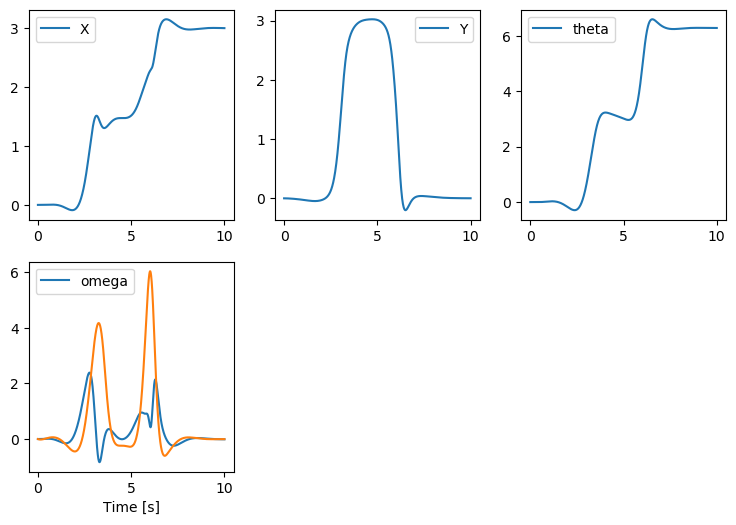

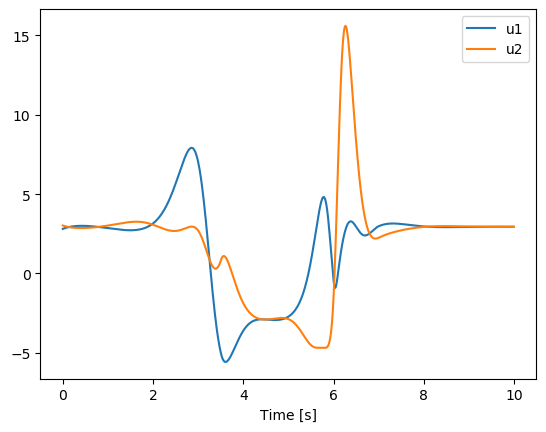

In [19]:
u_star = get_u_star(compute_cost, get_quadratic_approximation_cost)

def turn(state, i):
    return u_star[:,i]

t, state, u = quadrotor.simulate([0, 0, 0, 0, 0, 0], turn, N, disturbance = False)
show()